<a href="https://colab.research.google.com/github/WaraKaren/Misterio-SQL-CITY/blob/main/Misterio_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolviendo el Misterio del Asesinato en SQL City

¡Hola! Mi nombre es **Wara Pacajes** y este es mi proyecto donde resolví el *misterio del asesinato en SQL City*. Fue una experiencia maravillosa que me permitió reforzar mis conocimientos en **SQL** mientras investigaba este intrigante caso.
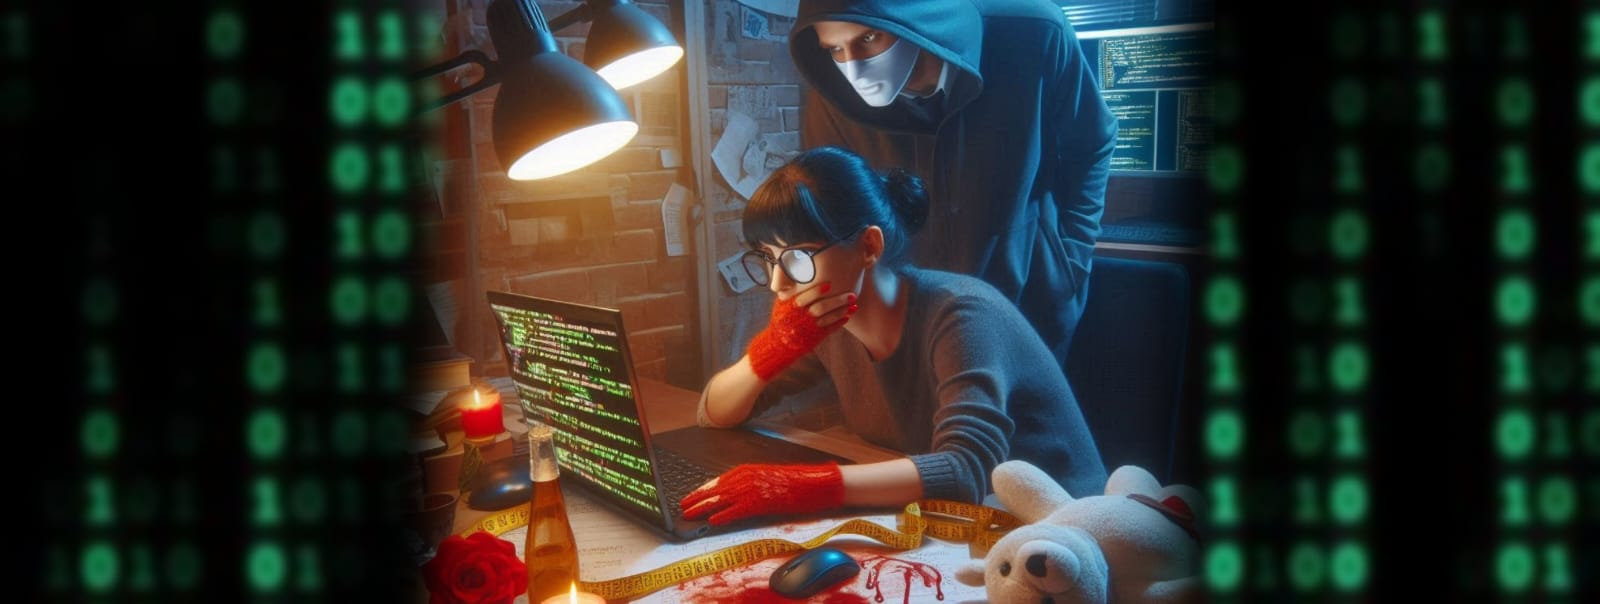




¡Se ha cometido un crimen y los detectives necesitaban mi ayuda! Me entregaron el informe de la escena del crimen, pero de alguna manera lo perdí. Recordaba vagamente que el crimen fue un asesinato que ocurrió el 15 de enero de 2018 y que tuvo lugar en SQL City. Dependía de mí averiguar quién era el asesino usando solo mis habilidades en SQL y mi ingenio. Me proporcionaron una conexión a la base de datos del Departamento de Policía, que tenía todas las pistas necesarias para atrapar al asesino.

Usando las habilidades que desarrollé en SQL 101 y 102, junto con otros recursos disponibles, procedí a resolver el SQL Murder Mystery.

A continuación, te mostraré cómo resolví el caso paso a paso.


## Conéctate a la base de datos del Departamento de Policía

Para comenzar y ejecutar las consultas, presiona play en la celda de abajo para conectarte a la base de datos del Departamento de Policía.

In [ ]:
%%capture
# @title Press Play { display-mode: "form" }
# Install `teachdb` and `coop_grader`
print("Installing `teachdb` and its dependencies...")
!pip install --quiet --upgrade git+https://github.com/freestackinitiative/teachingdb.git git+https://github.com/martinmarroyo/coop_grader.git
print("Successfully installed `teachdb`")
import pandas as pd
from teachdb.teachdb import connect_teachdb
from coop_grader.sql_murder_mystery.check_suspect import check_suspect
# Set configurations for notebook
%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 99)
# Load data
con = connect_teachdb(database="sql_murder_mystery")

%sql con

### Listando todas las tablas en la base de datos de la Policía

Primero, veremos todas las tablas disponibles para nosotros consultando la vista `information_schema.tables`.

In [ ]:
%%sql
SELECT *
FROM information_schema.tables

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action,TABLE_COMMENT
0,memory,main,crime_scene_report,BASE TABLE,None,None,None,None,None,YES,NO,None,None
1,memory,main,drivers_license,BASE TABLE,None,None,None,None,None,YES,NO,None,None
2,memory,main,facebook_event_checkin,BASE TABLE,None,None,None,None,None,YES,NO,None,None
3,memory,main,get_fit_now_check_in,BASE TABLE,None,None,None,None,None,YES,NO,None,None
4,memory,main,get_fit_now_member,BASE TABLE,None,None,None,None,None,YES,NO,None,None
5,memory,main,income,BASE TABLE,None,None,None,None,None,YES,NO,None,None
6,memory,main,interview,BASE TABLE,None,None,None,None,None,YES,NO,None,None
7,memory,main,person,BASE TABLE,None,None,None,None,None,YES,NO,None,None


---

## Resolviendo el misterio del asesinato.

Primero, identificamos las personas que estaban en la escena del crimen el día del asesinato.


**Personas presentes el dia del asesinato**

In [ ]:
 %%sql
SELECT * FROM crime_scene_report
WHERE city LIKE '%SQL%' AND type LIKE '%murder%' AND date = '20180115';

,person_id,event_name,asistencia
0,24556,SQL Symphony Concert,3
1,99716,SQL Symphony Concert,3


**Testigo#1**

Descubrí que un testigo vivía en el último número de una casa en Northwestern Ave.

In [ ]:
 %%sql
SELECT * FROM person
WHERE address_street_name LIKE '%Northwestern%'
ORDER BY address_number DESC
LIMIT 5;

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
1,17729,Lasonya Wildey,439686,3824,Northwestern Dr,917817122
2,53890,Sophie Tiberio,957671,3755,Northwestern Dr,442830147
3,73368,Torie Thalmann,773862,3697,Northwestern Dr,341559436
4,96595,Coretta Cubie,303645,3631,Northwestern Dr,378403829


**Testigo #2**

Encontré a otro testigo llamado Annabel que vivía en una avenida.

In [ ]:
 %%sql
SELECT * FROM person
WHERE name LIKE '%Annabel%' AND address_street_name LIKE '%Ave%';

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


**Entrevista de los Testigos**

In [ ]:
 %%sql
SELECT * FROM interview
WHERE person_id = '14887' OR person_id = '16371';

,person_id,transcript
0,14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership nu..."
1,16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last we..."


**Pistas Relevantes**

Investigué una pista importante relacionada con un check-in en el gimnasio que tenia relacion la menbresia del GYM "48Z".

In [ ]:
 %%sql
SELECT * FROM get_fit_now_check_in
WHERE check_in_date = '20180109' AND membership_id LIKE '48Z%';

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,20180109,1600,1730
1,48Z55,20180109,1530,1700


**Búsqueda por Placa de Vehículo**

Seguí una pista buscando un número de placa específico en relacion al testimonio de los testigo "H42W".

In [ ]:
 %%sql
SELECT * FROM drivers_license
WHERE plate_number LIKE '%H42W%';

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,183779,21,65,blue,blonde,female,H42W0X,Toyota,Prius
1,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,664760,21,71,black,black,male,4H42WR,Nissan,Altima


**Identificación de Sospechosos**

Encontré a los sospechosos utilizando los números de licencia de los vehículos.

In [ ]:
 %%sql
SELECT * FROM person
WHERE license_id = '183779'
OR license_id = '423327'
OR license_id = '664760';

,id,name,license_id,address_number,address_street_name,ssn
0,51739,Tushar Chandra,664760,312,Phi St,137882671
1,78193,Maxine Whitely,183779,110,Fisk Rd,137882671
2,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


**Entrevista - testimonio**

luego de obtener la id de las personas se busco en la tabla de las entrevistas y solo una perosna tenia registrado su entrevista.

In [ ]:
 %%sql
SELECT * FROM interview
WHERE person_id = '78193'
OR person_id = '67318'
OR person_id = '51739';

,person_id,transcript
0,67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" ..."


**Pista conductor**

Gracias al testimonio del conductor se logro dar con el/la sospecho@ pricipal.

In [ ]:
 %%sql
SELECT * FROM drivers_license
WHERE car_make LIKE '%Tesla%'
AND car_model LIKE '%S%'
AND gender LIKE '%female%'
AND hair_color LIKE '%red%'



,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S
1,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,918773,48,65,black,red,female,917UU3,Tesla,Model S


**Buscamos mas informacion sobre las caracteristicas**

logramos obtener los nombres de las sospechosas.

In [ ]:
 %%sql
 SELECT * FROM person
 WHERE license_id = 202298
 OR license_id = 291182
 OR license_id = 918773;

,id,name,license_id,address_number,address_street_name,ssn
0,78881,Red Korb,918773,107,Camerata Dr,961388910
1,99716,Miranda Priestly,202298,1883,Golden Ave,987756388
2,90700,Regina George,291182,332,Maple Ave,337169072


**Union de pistas con la sistencia en los conciertos**

Miranda, que tiene el **ID 90716**, es la única que asistió al concierto 3 veces, como lo dijo el testigo.

In [ ]:
%%sql
SELECT * FROM facebook_event_checkin
WHERE (date >= 20171201 AND date <= 20171231)
  AND (person_id = 78881 OR person_id = 99716 OR person_id = 90700);


,person_id,event_id,event_name,date
0,99716,1143,SQL Symphony Concert,20171206
1,99716,1143,SQL Symphony Concert,20171212
2,99716,1143,SQL Symphony Concert,20171229


# Resolviendo el Misterio
Para asegurarme de haber resuelto el misterio, tuve que superar la siguiente prueba: identificar al sospechoso principal comparando su información con las pistas encontradas en la base de datos. Estoy feliz de decir que la superé con éxito al confirmar que *Miranda Priestly* era la persona que cometió el crimen.

In [ ]:
check_suspect("Miranda Priestly")

Congrats, you found the brains behind the murder!
Everyone in SQL City hails you as the greatest SQL detective of all time.
Time to break out the champagne!


True